## Simple demonstration of KalmanFilter with ConstantVelocity Model

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from bayesfilt.filters import KalmanFilter
from bayesfilt.models import ConstantVelocity, LinearObservationModel

In [4]:
# generate observations
np.random.seed(30)
dt_true = 0.1
nsamples = 100
tlist = np.linspace(0,nsamples*dt_true, nsamples)
y_true = np.sin(1.*tlist) 
ylist = y_true + 0.1*np.random.randn(nsamples)

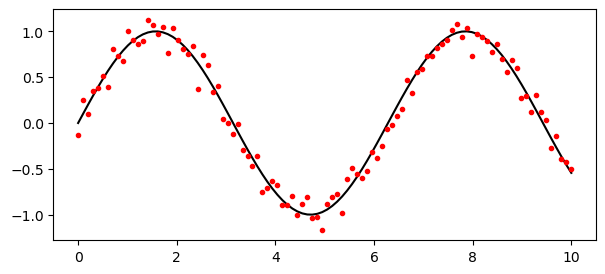

In [5]:
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(tlist, y_true, '-k')
ax.plot(tlist, ylist, '.r')

In [6]:
# dynamics model
mm = ConstantVelocity(dof=1, sigma_speed=0.2)
mm

ConstantVelocity(name='ConstantVelocity1D', nx=2, xnames=['Position0', 'Speed0'])

In [7]:
# observation model
om = LinearObservationModel(nx=2, obs_state_inds=[0], xnames=mm.xnames)
om

LinearObservationModel(name='LinearObsModel(2/1)', nx=2, xnames=['Position0', 'Speed0'])

In [8]:
# kalman filter
dt=0.05
kf = KalmanFilter(
    nx=mm.nx,
    ny=om.ny,
    dt=dt,
    mat_F=mm.func_Fmat(dt=dt),
    mat_H=om.Hmat,
    mat_Q=mm.func_Qmat(dt=dt),
    xnames=mm.xnames
)
kf

KalmanFilter: Setting dt_tol to 0.025


KalmanFilter(nx=2, ny=1, dt=0.05, dt_tol=0.025, epsilon=1e-06, verbose=False, object_id=0)

In [9]:
# initiate and run
kf.initiate(
    t0=tlist[0],
    m0=[ylist[0],0],
    P0=np.diag([0.1, 0.1]),
    flag='Update'
)
kf.filter(
    list_of_t=tlist[1:],
    list_of_y=ylist[1:],
    list_of_R = np.diag([0.1**2])
)
kf.smoother()

KalmanFilter(S): 100%|██████████| 300/300 [00:00<00:00, 616.35it/s]


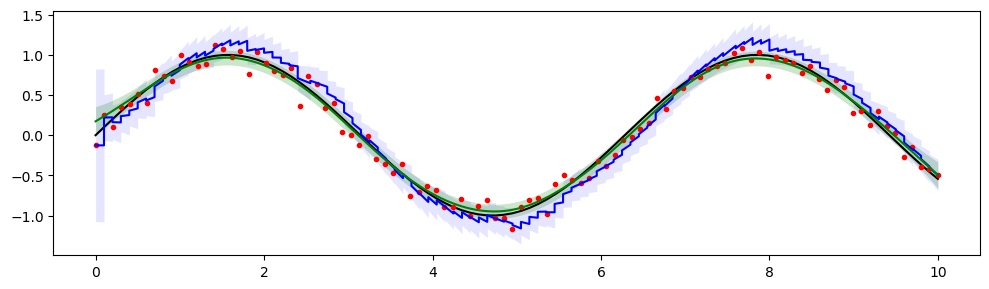

In [10]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(tlist, y_true, '-k')
ax.plot(tlist, ylist, '.r')
# filter
ax.plot(kf.logger.time_elapsed, kf.logger.state_mean_i(0), '-b')
ax.fill_between(
    kf.logger.time_elapsed, 
    kf.logger.state_mean_i(0) - 3*np.sqrt(kf.logger.state_var_ij(0)), 
    kf.logger.state_mean_i(0) + 3*np.sqrt(kf.logger.state_var_ij(0)),
    color='b', alpha=0.1, lw=0
)
# smoother
ax.plot(kf.slogger.time_elapsed, kf.slogger.state_mean_i(0), '-g')
ax.fill_between(
    kf.slogger.time_elapsed, 
    kf.slogger.state_mean_i(0) - 3*np.sqrt(kf.slogger.state_var_ij(0)), 
    kf.slogger.state_mean_i(0) + 3*np.sqrt(kf.slogger.state_var_ij(0)),
    color='g', alpha=0.2, lw=0
)
fig.tight_layout()

In [11]:
kf.df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 299
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TimeElapsed    201 non-null    float64
 1   Flag           201 non-null    object 
 2   Position0      201 non-null    float64
 3   Position0_Var  201 non-null    float64
 4   Speed0         201 non-null    float64
 5   Speed0_Var     201 non-null    float64
 6   XresNorm       99 non-null     float64
 7   YresNorm       99 non-null     float64
 8   NIS            99 non-null     float64
 9   NEES           99 non-null     float64
 10  LogLik         99 non-null     float64
dtypes: float64(10), object(1)
memory usage: 18.8+ KB


In [12]:
kf.dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TimeElapsed    201 non-null    float64
 1   Flag           201 non-null    object 
 2   Position0      201 non-null    float64
 3   Position0_Var  201 non-null    float64
 4   Speed0         201 non-null    float64
 5   Speed0_Var     201 non-null    float64
 6   XresNorm       99 non-null     float64
 7   YresNorm       99 non-null     float64
 8   NIS            99 non-null     float64
 9   NEES           99 non-null     float64
 10  LogLik         99 non-null     float64
dtypes: float64(10), object(1)
memory usage: 17.4+ KB
